In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [90]:
NUM_TRIALS = 10000
BANDIT_PROBABILITIES = [0.23, 0.6, 0.79]

In [91]:
class Bandit:
  def __init__(self, p):
    self.p = p # it's the true values of the probability which we actually don't know
    self.p_estimate = 10 # it's a large number (hyperparameter) which our exploration depend on
    self.N = 0
  
  def pull(self):
    return np.random.random() < self.p
  
  def update(self, x):
    self.N += 1
    self.p_estimate = ((self.p_estimate * self.N) + x) / (self.N + 1)
  
  

In [92]:
def experiment():
  bandits = [Bandit(p) for p in BANDIT_PROBABILITIES]
  rewards = np.zeros(NUM_TRIALS)

  for i in range(NUM_TRIALS):
    
    # use optimistic initial values to select the next bandit
    j = np.argmax([b.p_estimate for b in bandits])

    # Pull the arm for the bandit with the largest p_estimate
    x = bandits[j].pull()

    # Update the rewards log
    rewards[i] = x

    # Update the bandit's information which we just pulled
    bandits[j].update(x)
  
  # print mean estimates for each bandit
  for b in bandits:
    print("mean estimate:", b.p_estimate)

  # print total reward
  print("total reward earned:", rewards.sum())
  print("overall win rate:", rewards.sum() / NUM_TRIALS)
  print("num times selected each bandit:", [b.N for b in bandits])

  # plot the results
  cumulative_rewards = np.cumsum(rewards)
  win_rates = cumulative_rewards / (np.arange(NUM_TRIALS) + 1)
  plt.ylim([0, 1])
  plt.plot(win_rates)
  plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROBABILITIES))
  plt.show()

mean estimate: 0.782608695652174
mean estimate: 0.7826086956521741
mean estimate: 0.7978659150392593
total reward earned: 7950.0
overall win rate: 0.795
num times selected each bandit: [22, 45, 9933]


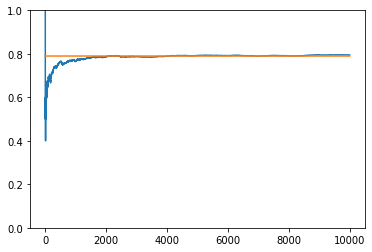

In [93]:
experiment()